In [ ]:
# Mount the Google drive to the Colab notebook.
# It means that I giving access to the files in your google drive to Colab notebook.
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Change the current working directory to where you want to download the Kaggle dataset
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
# Import the relevant modules to be used later
import os
import struct
import sys
import re 
from tqdm import tqdm
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import glob 
import shutil
import time
import wave
import pathlib
from IPython.display import display, Audio
import IPython

# Math
import numpy as np # linear algebra
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile as wav
from scipy.io import wavfile
import librosa
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
    
# Config matplotlib for inline plotting
%matplotlib inline

In [ ]:
# Defining our current directory path and the dataset path
train_data_dir = '/content/gdrive/MyDrive/speech_commands_v02/'

In [ ]:
# Loading train dataset 
# Read all the audio files that are for training
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/speech_commands_v02/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
/content/gdrive/MyDrive/speech_commands_v02/eight/55d3725a_nohash_0.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/b49caed3_nohash_4.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/352ffbe3_nohash_1.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/ede2f4ee_nohash_0.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/bcf614a2_nohash_4.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/879a2b38_nohash_3.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/ffd2ba2f_nohash_1.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/726382d6_nohash_0.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/72242187_nohash_1.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/508e30ee_nohash_2.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/c634a189_nohash_2.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/893705bb_nohash_5.wav
/content/gdrive/MyDrive/speech_commands_v02/eight/cdfbbe75_nohash_0.wav
/content/

In [ ]:
paths, labels, files = [], [], []
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/speech_commands_v02/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = dirname.split('/')[-1]
        labels.append(label)
        file = filename.split('/')[0] # split and keep only the .wav file from the path, i.e '01648c51_nohash_0.wav'.
        files.append(file)
        #break

In [ ]:
# Create a dataframe
dictionary = {'fname': files, 'label': labels,'path': paths}
train_df = pd.DataFrame(dictionary)

In [ ]:
train_df

fname   label  \
0        88a487ce_nohash_0.wav  sheila   
1        68effe85_nohash_0.wav  sheila   
2        56eb74ae_nohash_0.wav  sheila   
3        f33660af_nohash_0.wav  sheila   
4        14587ff0_nohash_0.wav  sheila   
...                        ...     ...   
105831   2bdbe5f7_nohash_1.wav    five   
105832   91b03183_nohash_2.wav    five   
105833   64e48f55_nohash_2.wav    five   
105834  b5cf6ea8_nohash_10.wav    five   
105835   9db2bfe9_nohash_2.wav    five   

                                                     path  
0       /content/gdrive/MyDrive/speech_commands_v02/sh...  
1       /content/gdrive/MyDrive/speech_commands_v02/sh...  
2       /content/gdrive/MyDrive/speech_commands_v02/sh...  
3       /content/gdrive/MyDrive/speech_commands_v02/sh...  
4       /content/gdrive/MyDrive/speech_commands_v02/sh...  
...                                                   ...  
105831  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105832  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105833  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105834  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105835  /content/gdrive/MyDrive/speech_commands_v02/fi...  

[105836 rows x 3 columns]

In [ ]:
print("Number of training examples: %d"%(train_df.shape[0]))
print("Number of Classes: %d"%(train_df.label.nunique()))
print("\nClasses: ",train_df.label.unique())

Number of training examples: 105836
Number of Classes: 36

Classes:  ['sheila' 'nine' 'yes' 'one' 'no' 'left' 'tree' 'go' 'wow' 'seven'
 'marvin' 'three' 'two' 'house' 'six' 'off' 'right' 'zero' 'four'
 'forward' 'stop' 'up' 'visual' 'learn' 'on' 'happy' 'follow'
 '_background_noise_' 'backward' 'bed' 'bird' 'cat' 'dog' 'down' 'eight'
 'five']


In [ ]:
samples_count = train_df['label'].value_counts()
samples_count

five                  4052
zero                  4052
yes                   4044
seven                 3998
no                    3941
nine                  3934
down                  3917
one                   3890
go                    3880
two                   3880
stop                  3872
six                   3860
on                    3845
left                  3801
eight                 3787
right                 3778
off                   3745
four                  3728
three                 3727
up                    3723
dog                   2128
wow                   2123
house                 2113
marvin                2100
bird                  2064
happy                 2054
cat                   2031
sheila                2022
bed                   2014
tree                  1759
backward              1664
visual                1592
follow                1579
learn                 1575
forward               1557
_background_noise_       7
Name: label, dtype: int64

In [ ]:
filename = 'cat/3cbd76a3_nohash_0.wav'
fname = os.path.join(train_data_dir, filename)  
wav = wave.open(fname)
print("Sampling (frame) rate = ", wav.getframerate())
print("Total samples (frames) = ", wav.getnframes())
print("Duration = ", wav.getnframes()/wav.getframerate())

ipd.Audio(fname)

Sampling (frame) rate =  16000
Total samples (frames) =  16000
Duration =  1.0


In [ ]:
# Print the different classes (words) that are part of the dataset.
t_labels = [w for w in os.listdir(train_data_dir) if os.walk(train_data_dir, w)]
t_labels.sort() 
print(t_labels)

['_background_noise_', 'audio', 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


Minimum samples per category =  7
Maximum samples per category =  4052


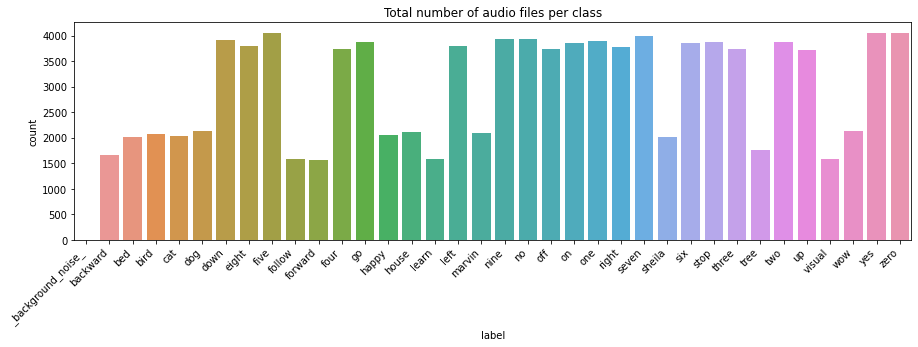

In [ ]:
## Data Visualization
# Find count of each label and plot bar graph
plt.figure(figsize=(15,4))
labels_grouped = train_df.groupby(by=['label'], ).count()
chart = sns.barplot(x=labels_grouped.index, y=labels_grouped["fname"])
chart.set_xticklabels(labels=chart.get_xticklabels(), rotation=45, horizontalalignment='right');
chart.set_title("Total number of audio files per class");
chart.set_ylabel('count');
print('Minimum samples per category = ', min(train_df['label'].value_counts()))
print('Maximum samples per category = ', max(train_df['label'].value_counts()))

In [ ]:
# Plot Waveplots and Spectograms for audio signals.
# 1. Waveplots

In [ ]:
def waveplot(samples, sr, speech):
    plt.figure(figsize=(15, 4))
    plt.title('{}'.format(speech), size=15)
    librosa.display.waveplot(samples, sr=sr)
    plt.show()

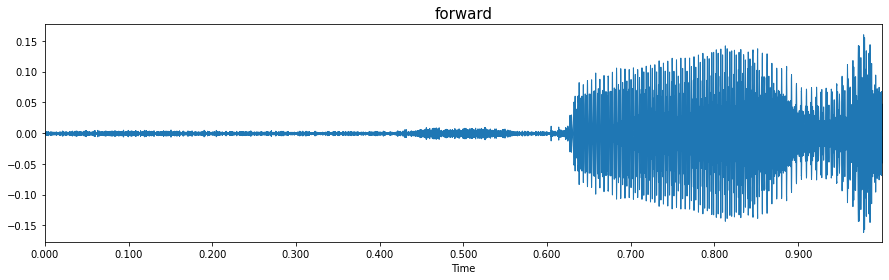

In [ ]:
speech = 'forward'
path = np.array(train_df['path'][train_df['label']==speech])[1]
samples, sampling_rate = librosa.load(path)
waveplot(samples, sampling_rate, speech)
Audio(path)

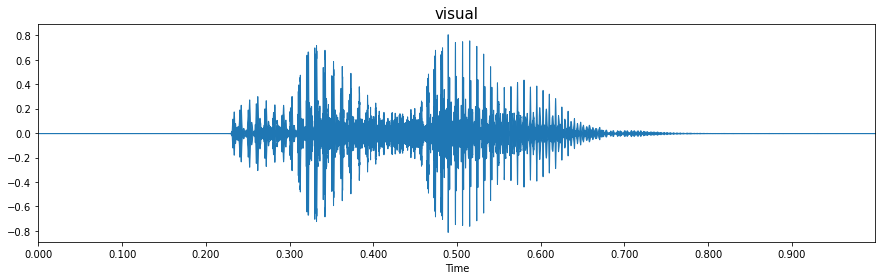

In [ ]:
speech = 'visual'
path = np.array(train_df['path'][train_df['label']==speech])[1]
samples, sampling_rate = librosa.load(path)
waveplot(samples, sampling_rate, speech)
Audio(path)

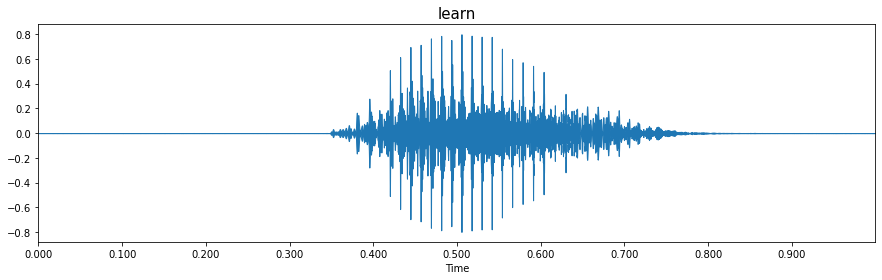

In [ ]:
speech = 'learn'
path = np.array(train_df['path'][train_df['label']==speech])[1]
samples, sampling_rate = librosa.load(path)
waveplot(samples, sampling_rate, speech)
Audio(path)

In [ ]:
train_labels = os.listdir(train_data_dir)
wav = []
labels = []
for label in train_labels:
    if label == '_background_noise_':
        continue
    files = os.listdir(train_data_dir + '/' + label)
    for i in files:
        if not i.endswith('wav'):
            train_labels.remove('_background_noise_')
            continue
        wav.append(i)
        labels.append(label)    
train = pd.DataFrame({'label':labels, 'file':wav})
train.head()

Spectrograms

In [ ]:
# Function for spectrograms
def spectrogram(file, label):
    eps=1e-10
    sample_rate, samples = wavfile.read(str(train_data_dir) + label + '/' + file)
    frequencies, times, spectrogram = signal.stft(samples, sample_rate, nperseg = sample_rate/50, noverlap = sample_rate/75) # nperseg - Length of each sample segment, noverlap - Length of overlap of windows
    return np.log(np.abs(spectrogram).T+eps)

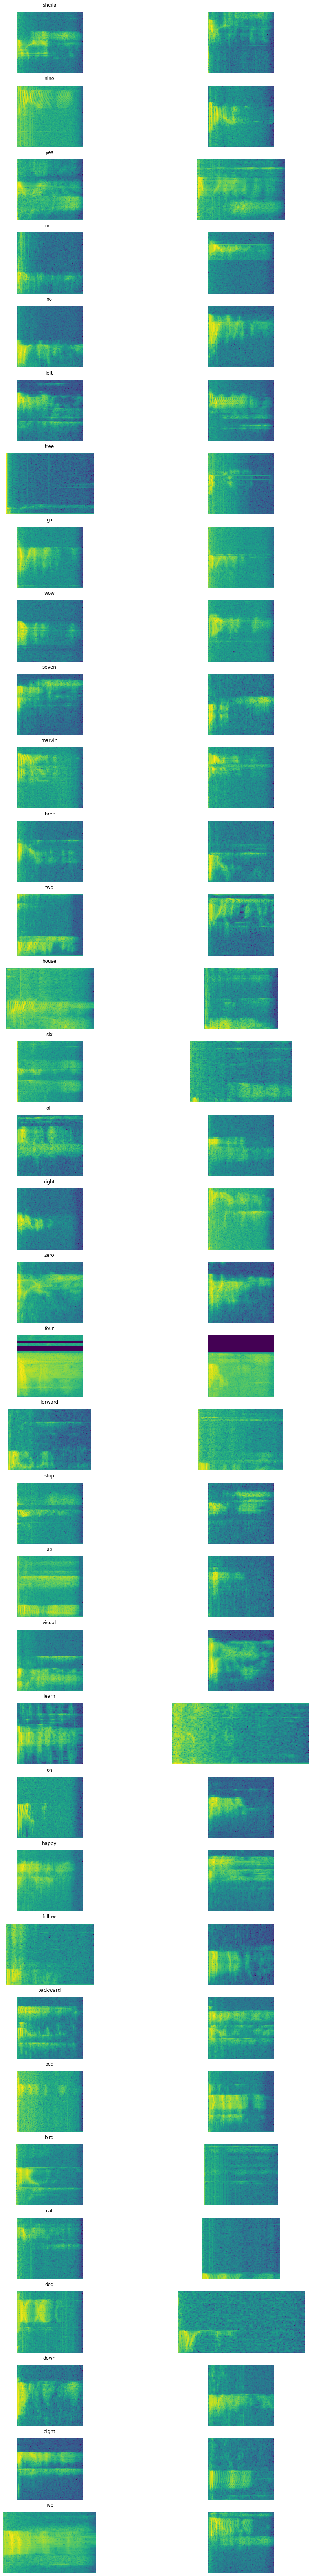

In [ ]:
num_samples = 2
labels = train.label.unique()
fig, axes = plt.subplots(len(labels),num_samples, figsize = (16, 120))
for i,label in enumerate(labels):
    files = train[train.label==label].file.sample(num_samples)
    axes[i][0].set_title(label)
    for j, file in enumerate(files):
        specgram = spectrogram(file, label)
        axes[i][j].axis('off')
        axes[i][j].matshow(specgram)

In [ ]:
def log_spectrogram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Seconds')

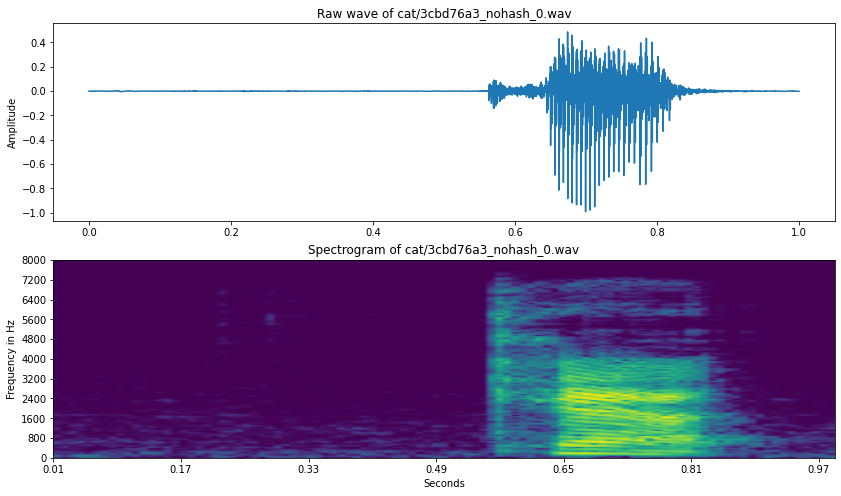

In [ ]:
samples, sample_rate = librosa.load(train_data_dir + filename, sr=16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

freqs, times, spectrogram = log_spectrogram(samples, sample_rate)
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Frequency in Hz')
ax2.set_xlabel('Seconds')

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=b15ea7b5950ff3ba81cd85b2d5e0905bc438f78f3cd9ec786343339dafe92034
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
# Spectrogram in 3d
import chart_studio.plotly as py
import plotly.offline as py
import plotly.graph_objs as go


data = [go.Surface(x=times, y=freqs, z=spectrogram.T)]
layout = go.Layout(
    title='Spectrogram of "cat" in 3d',
    scene = dict(
        yaxis = dict(title='Frequencies', range=[freqs.min(), freqs.max()]),
        xaxis = dict(title='Time', range=[times.min(), times.max()]),
        zaxis = dict(title='Log amplitude')
    )
)
fig = go.Figure(data=data, layout=layout)
py.plot(fig)

'temp-plot.html'

(128, 32)
(13, 32)
(13, 32)
(13, 32)


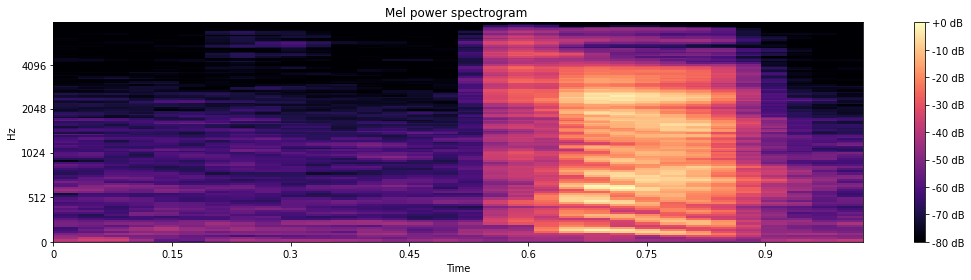

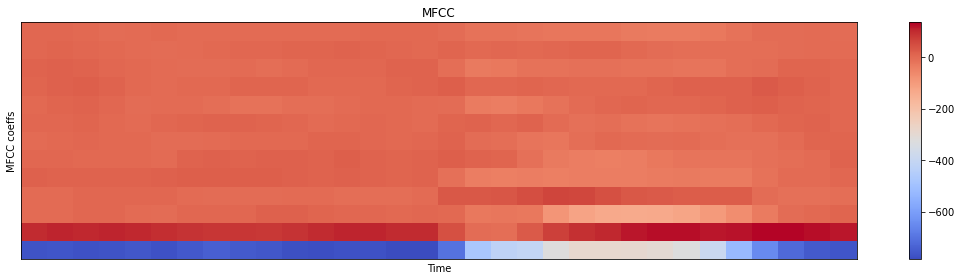

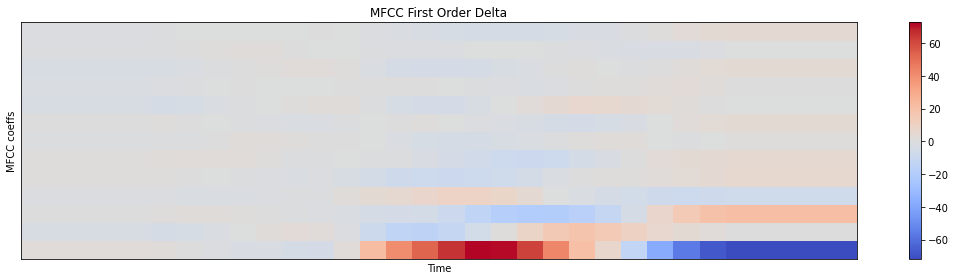

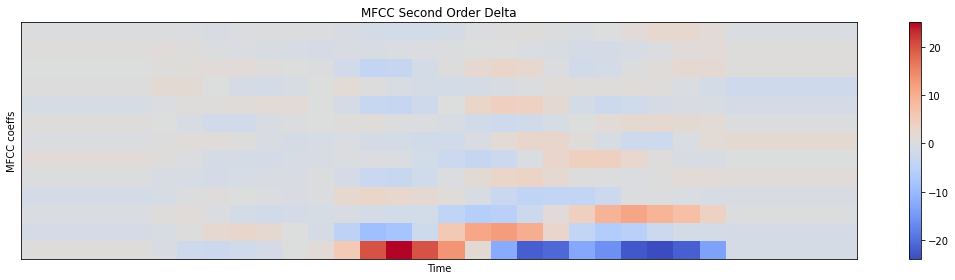

In [ ]:
# Using Librosa to plot mel scaled power spectrogram and MFCCs of signals
# Power Spectrogram and MFC

S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)
print(S.shape)
# Convert to log scale (dB).
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(15, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
print(mfcc.shape)
plt.figure(figsize=(15, 4))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

# Plotting First Order Delta MFCCs
delta1_mfcc = librosa.feature.delta(mfcc, order=1)
print(delta1_mfcc.shape)

plt.figure(figsize=(15, 4))
librosa.display.specshow(delta1_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC First Order Delta')
plt.colorbar()
plt.tight_layout()

# Plotting Second Order Delta MFCCs
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc.shape)

plt.figure(figsize=(15, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC Second Order Delta')
plt.colorbar()
plt.tight_layout()

In [ ]:
# Fast Forier Transform
def fft_(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2) 
    vals = 2.0 / N * np.abs(yf[0:N//2])
    return xf, vals

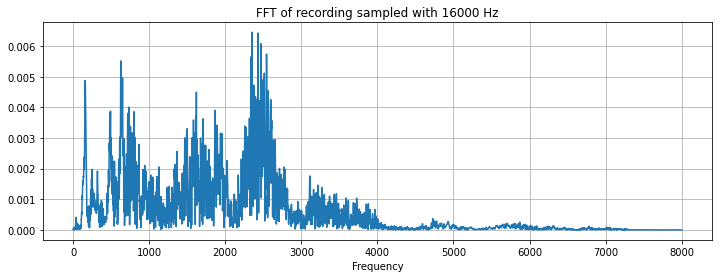

In [ ]:
xf, vals = fft_(samples, sample_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

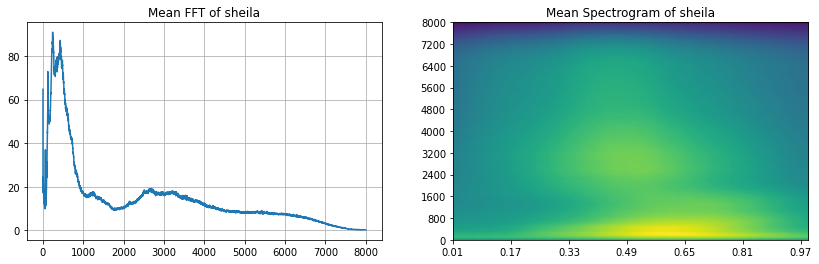

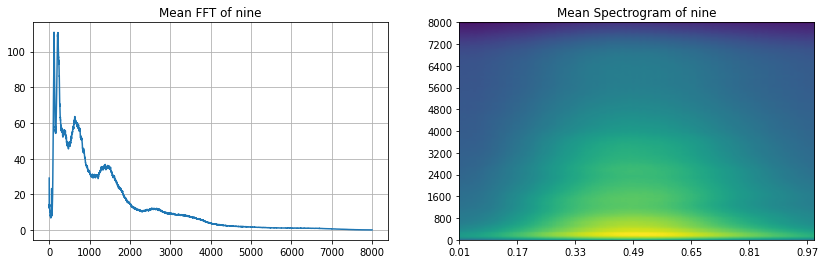

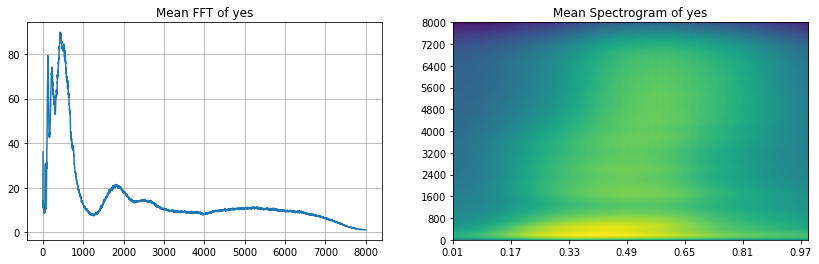

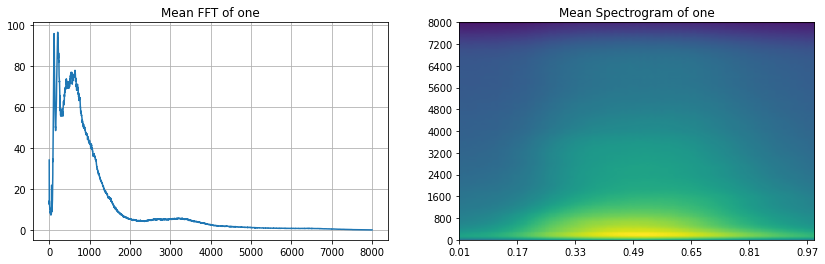

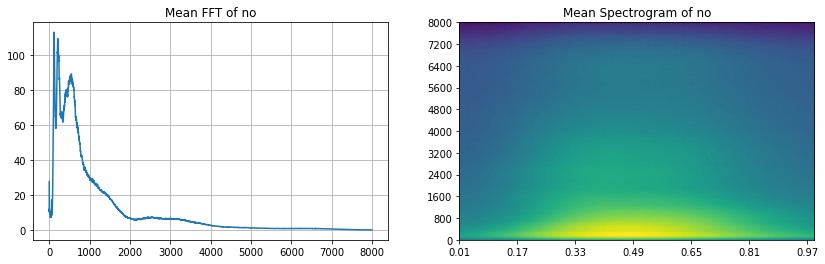

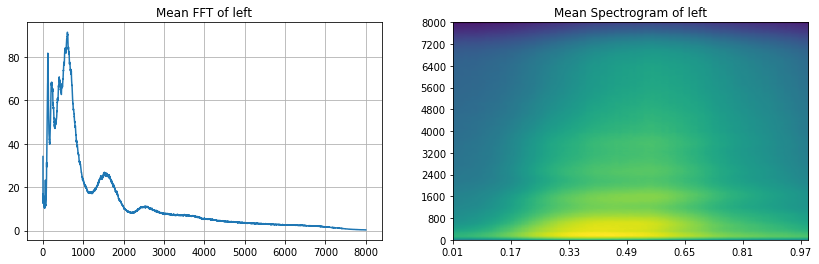

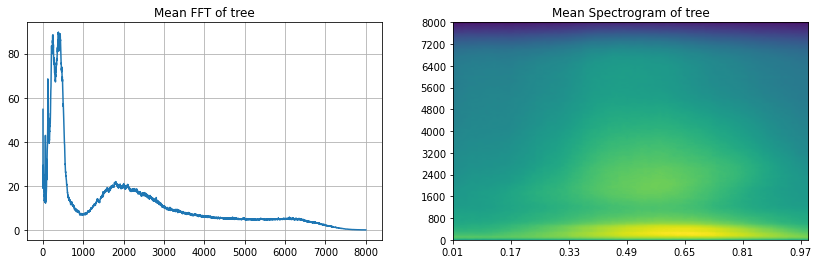

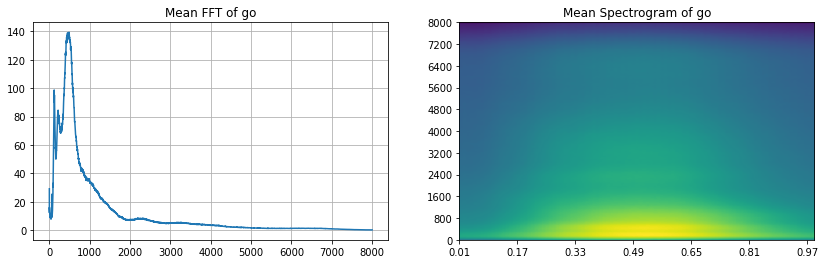

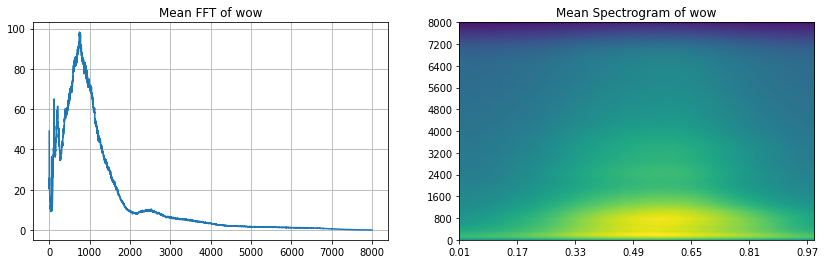

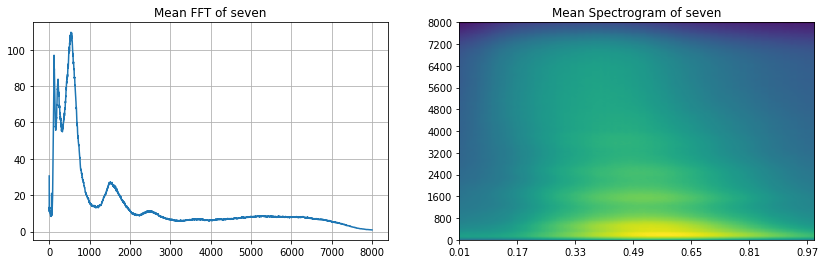

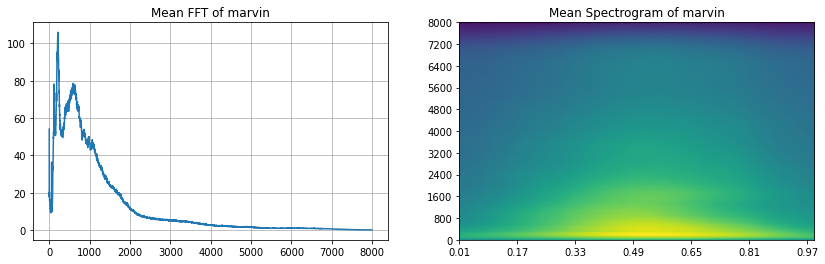

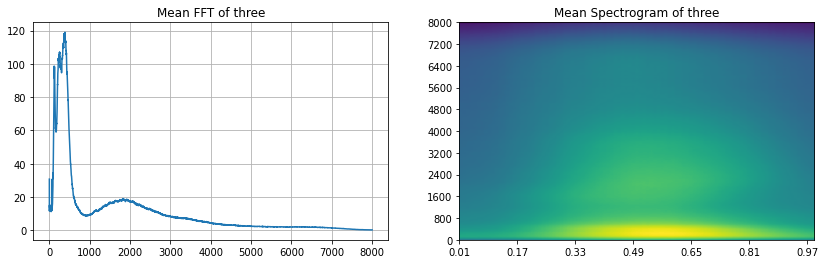

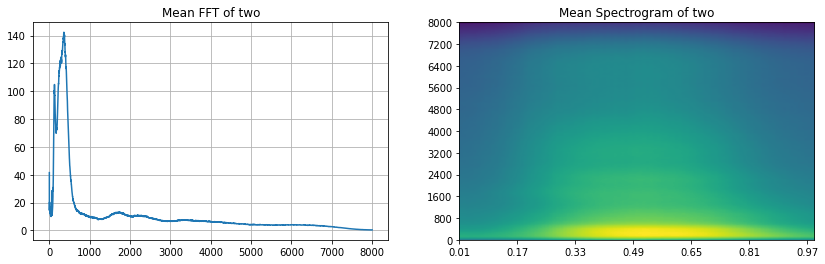

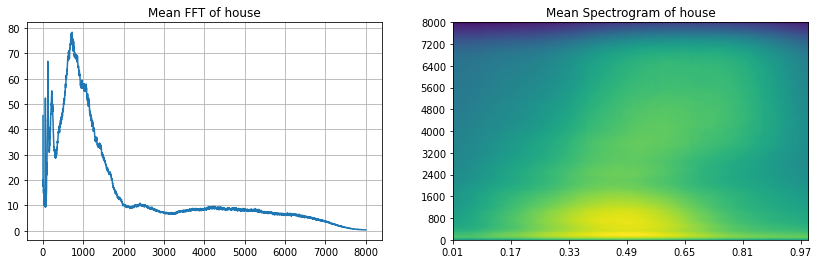

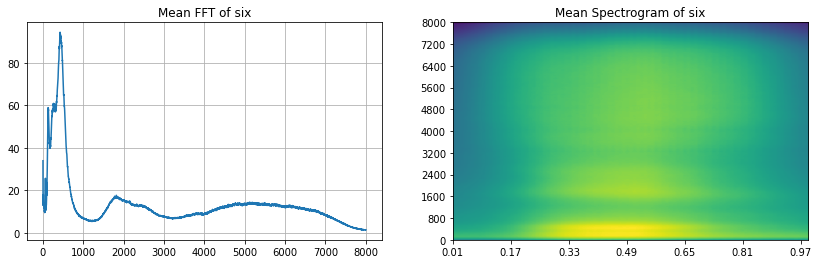

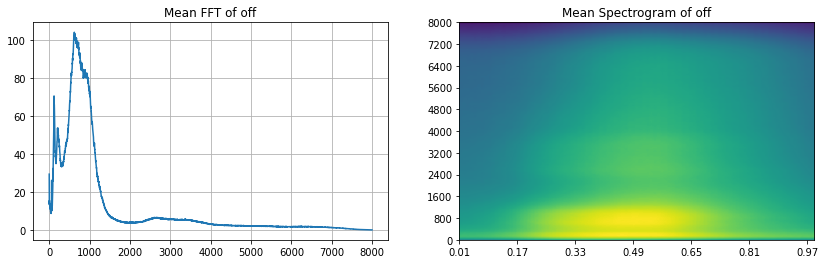

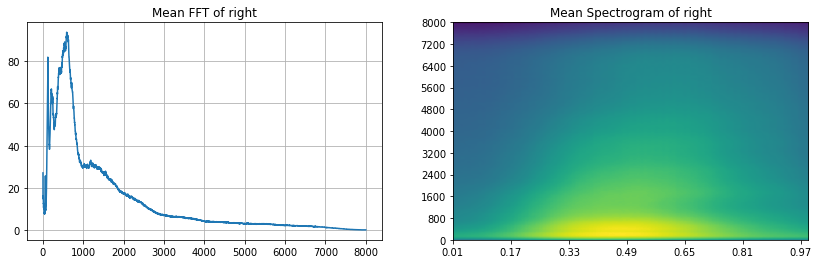

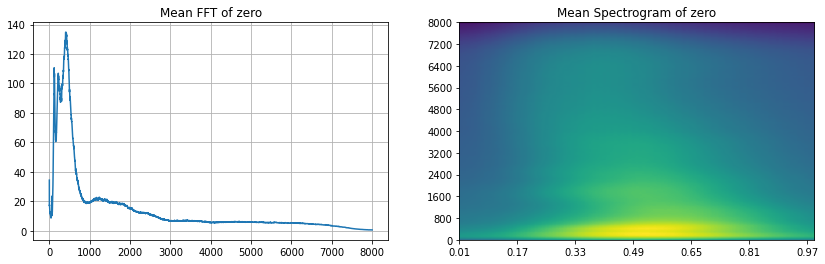

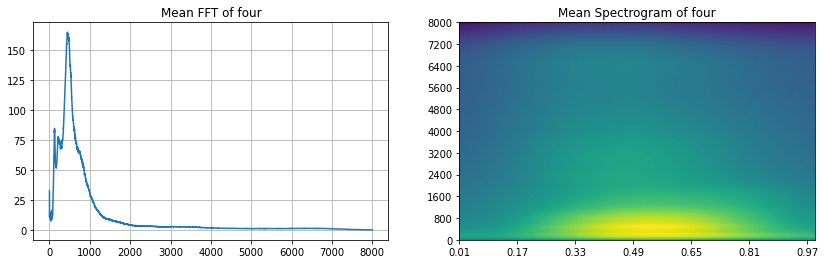

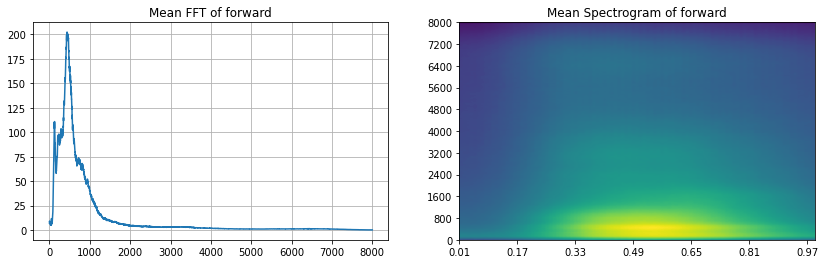

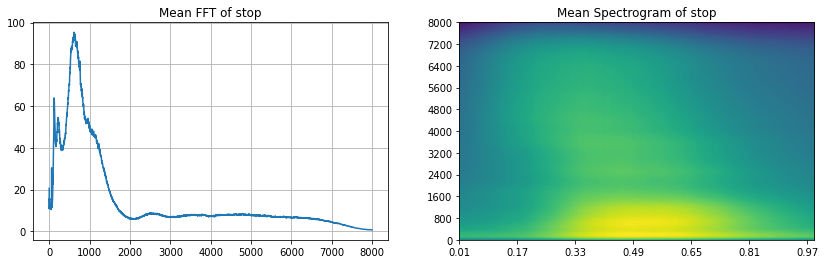

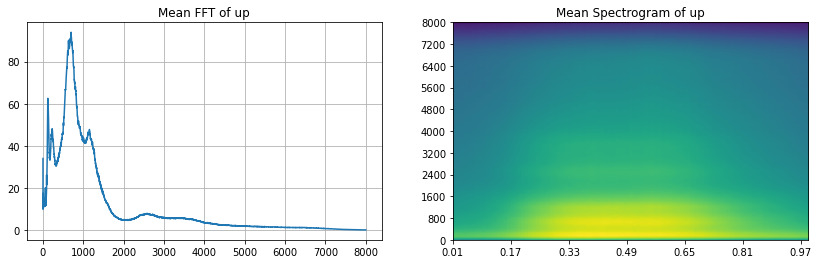

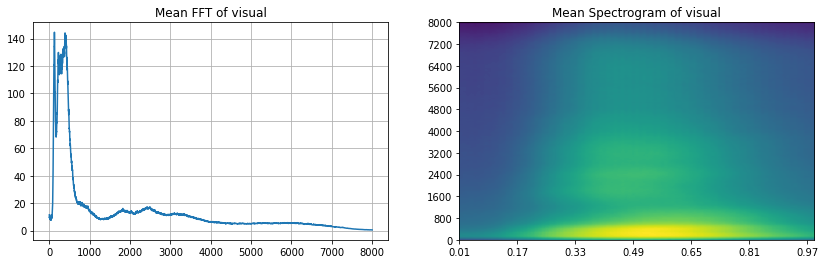

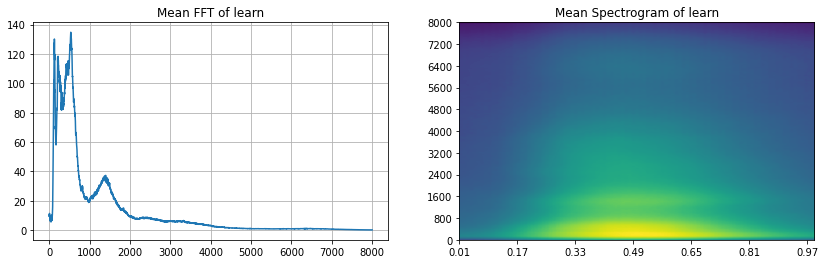

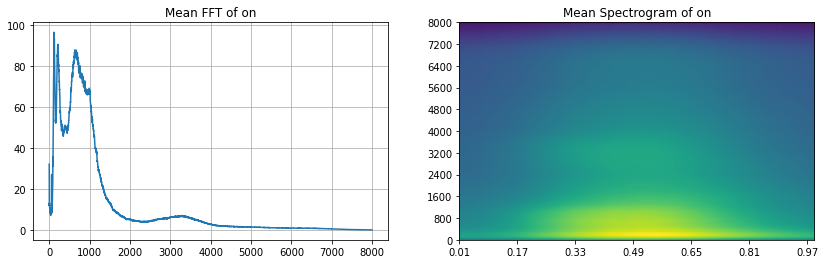

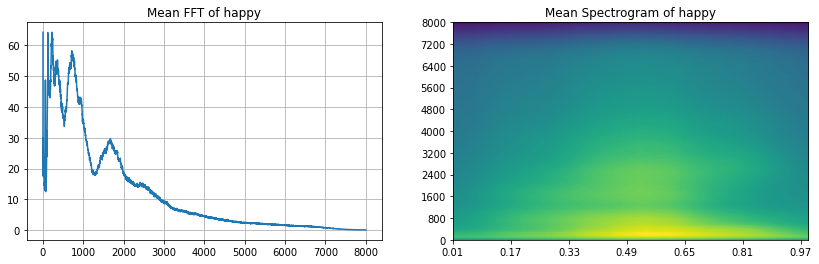

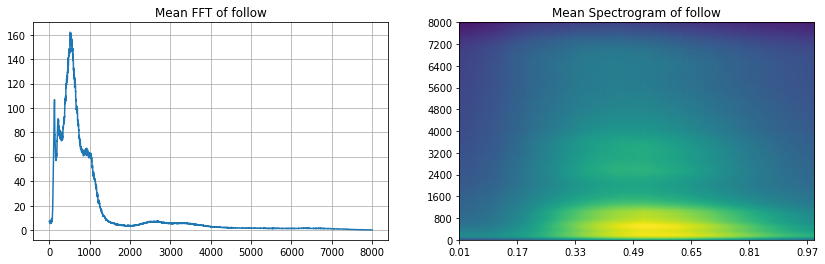

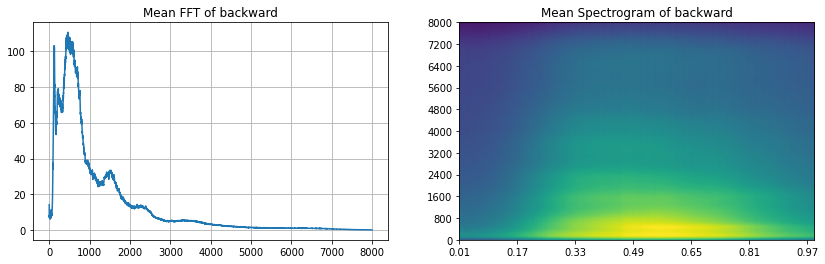

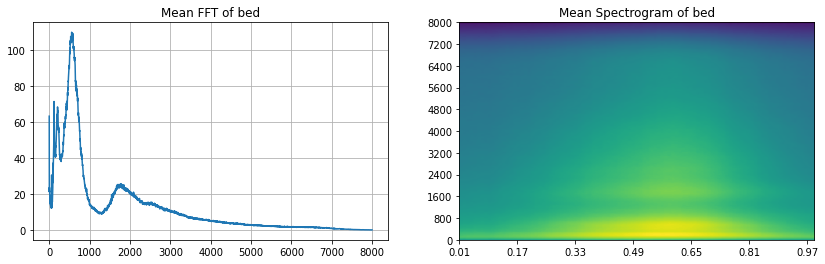

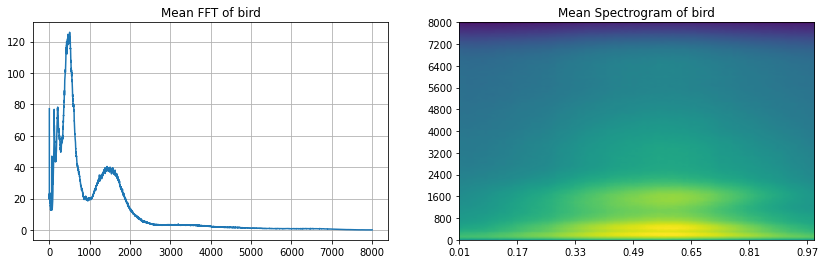

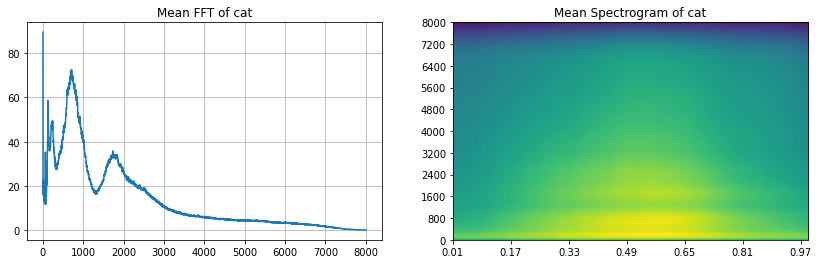

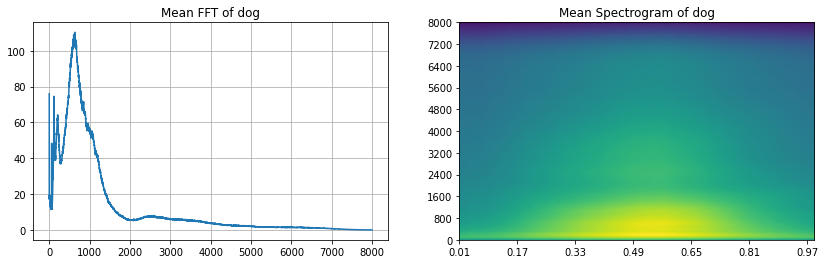

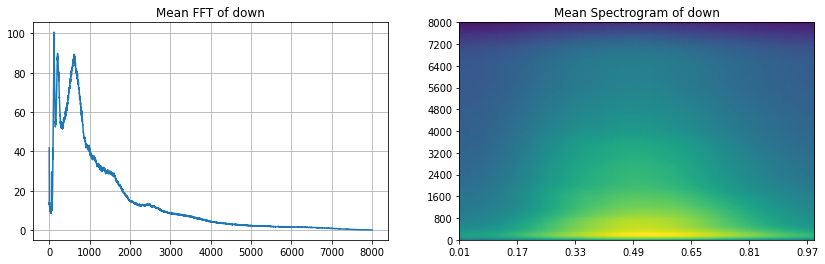

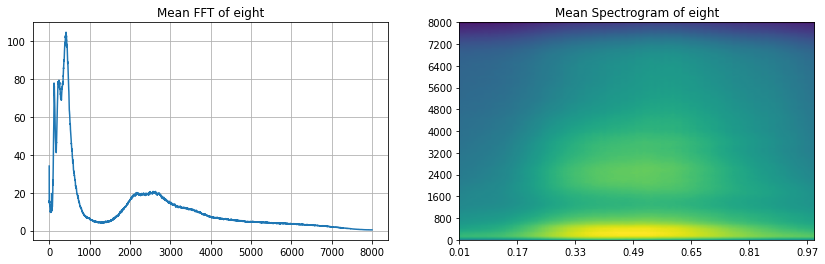

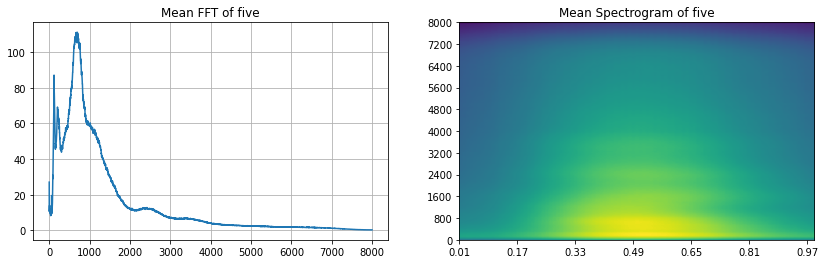

In [ ]:
# Plot mean FFT for every label of training dataset
train_labels.remove('_background_noise_')

for testfile in train_labels:
    padd = []
    spec1 = []

    waves = [f for f in os.listdir(os.path.join(train_data_dir, testfile)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_data_dir + testfile + '/' + wav) 
        if samples.shape[0] != 16000:
            continue
        xf, vals = fft_(samples, 16000)
        padd.append(vals)
        freqs, times, spec = log_spectrogram(samples, 16000)
        spec1.append(spec)

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.title('Mean Fast Fourier Transform of' + testfile)
    plt.plot(np.mean(np.array(padd), axis=0))
    plt.grid()
    plt.subplot(122)
    plt.title('Mean Spectrogram of' + testfile)
    plt.imshow(np.mean(np.array(spec1), axis=0).T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    plt.yticks(freqs[::16])
    plt.xticks(times[::16])
    plt.show()

In [ ]:
# Create a new dataframe without label '_background_noise_'
train_labels = os.listdir(train_data_dir)
wav, labels, paths = [], [], []
for label in train_labels:
    if label == '_background_noise_':
        continue
    files = os.listdir(train_data_dir + '/' + label)
    for i in files:
        if not i.endswith('wav'):
            train_labels.remove('_background_noise_')
            continue
        wav.append(i)
        labels.append(label)
        paths.append(train_data_dir + label + '/' + i)

label_df = pd.DataFrame(labels, columns=['label'])
file_df = pd.DataFrame(wav, columns=['file'])
path_df = pd.DataFrame(paths, columns=['path'])
wav_df = pd.concat([label_df, file_df, path_df], axis = 1)

In [ ]:
wav_df

label                    file  \
0       sheila   88a487ce_nohash_0.wav   
1       sheila   68effe85_nohash_0.wav   
2       sheila   56eb74ae_nohash_0.wav   
3       sheila   f33660af_nohash_0.wav   
4       sheila   14587ff0_nohash_0.wav   
...        ...                     ...   
105824    five   2bdbe5f7_nohash_1.wav   
105825    five   91b03183_nohash_2.wav   
105826    five   64e48f55_nohash_2.wav   
105827    five  b5cf6ea8_nohash_10.wav   
105828    five   9db2bfe9_nohash_2.wav   

                                                     path  
0       /content/gdrive/MyDrive/speech_commands_v02/sh...  
1       /content/gdrive/MyDrive/speech_commands_v02/sh...  
2       /content/gdrive/MyDrive/speech_commands_v02/sh...  
3       /content/gdrive/MyDrive/speech_commands_v02/sh...  
4       /content/gdrive/MyDrive/speech_commands_v02/sh...  
...                                                   ...  
105824  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105825  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105826  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105827  /content/gdrive/MyDrive/speech_commands_v02/fi...  
105828  /content/gdrive/MyDrive/speech_commands_v02/fi...  

[105829 rows x 3 columns]

In [ ]:
# All files are sampled at 16000 HZ
# The file length has been kept constant at 1 second.
# Zero Padding has been used in sound processing to make audio files of same length. The same has been implemented here.

In [ ]:
labels = [ 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero' ]

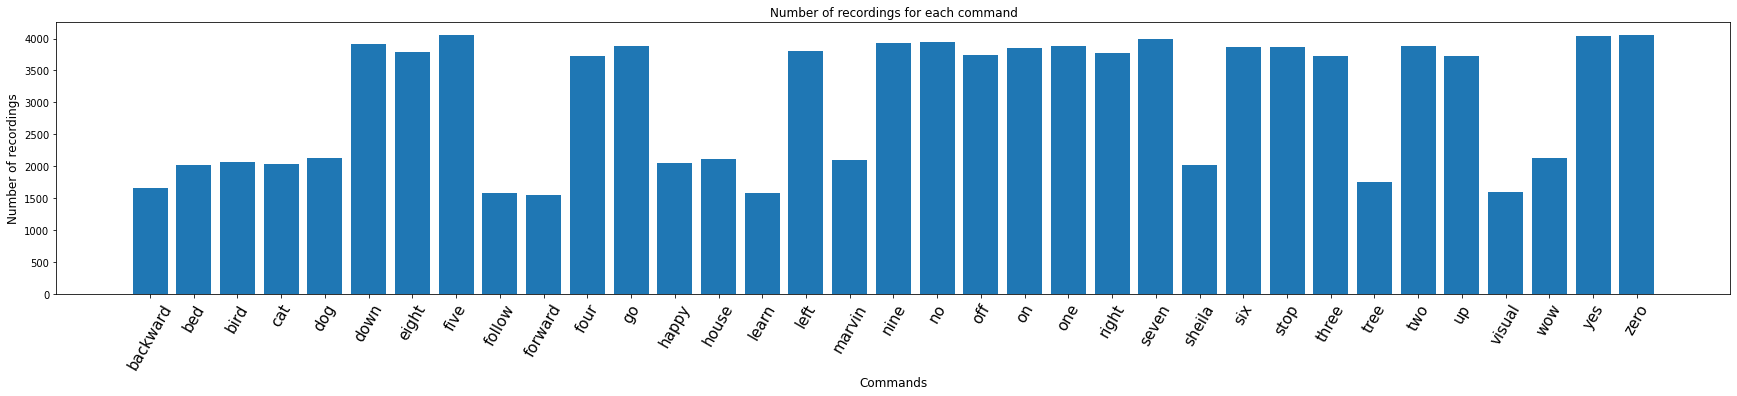

In [ ]:
# Count of each label and plot bar graph
wav_files=[]
for label in labels:
    waves = [f for f in os.listdir(train_data_dir + '/'+ label) if f.endswith('.wav')]
    wav_files.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, wav_files)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('Number of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('Number of recordings for each command')
plt.show()

In [ ]:
len(labels) #'background_noise' class doesn't containing

35

(array([4.0000e+00, 2.2000e+01, 1.1500e+02, 3.0200e+02, 6.6800e+02,
        8.5500e+02, 1.7170e+03, 2.0310e+03, 1.9040e+03, 9.8211e+04]),
 array([0.2133125 , 0.29198125, 0.37065   , 0.44931875, 0.5279875 ,
        0.60665625, 0.685325  , 0.76399375, 0.8426625 , 0.92133125,
        1.        ]),
 <a list of 10 Patch objects>)

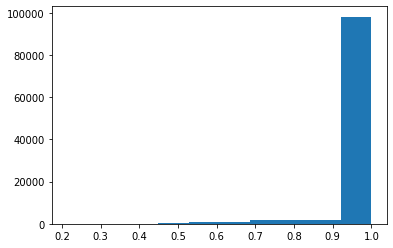

In [ ]:
#Duration of recordings 
diarkeia=[]
for label in labels:
    waves = [f for f in os.listdir(train_data_dir + '/'+ label) if f.endswith('.wav')]
    for w in waves:
        sample_rate, samples = wavfile.read(train_data_dir + '/'+ label + '/' + w)
        diarkeia.append(float(len(samples)/sample_rate))
d = np.array(diarkeia)   
plt.hist(d)

(array([4.0000e+00, 2.2000e+01, 1.1500e+02, 3.0200e+02, 6.6800e+02,
        8.5500e+02, 1.7170e+03, 2.0310e+03, 1.9040e+03, 9.8211e+04]),
 array([ 3413. ,  4671.7,  5930.4,  7189.1,  8447.8,  9706.5, 10965.2,
        12223.9, 13482.6, 14741.3, 16000. ]),
 <a list of 10 Patch objects>)

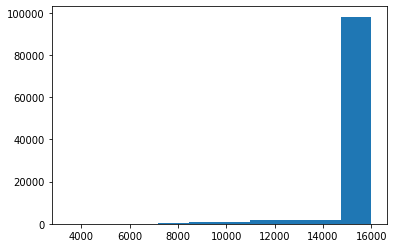

In [ ]:
# Lengths of recordings
lengths=[]
for label in labels:
    waves = [f for f in os.listdir(train_data_dir + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_data_dir + '/' + label + '/' + wav)
        samples, sr= librosa.load(train_data_dir + '/' + label + '/' + wav, sr=sample_rate)
        lengths.append(len(samples))
      
l=np.array(lengths)        
plt.hist(l)

In [ ]:
# Calculating number of recordings shorter than, bigger than and equal to 1 second.
shorter = 0
bigger = 0
equal = 0
for d in labels:
    waves = [f for f in os.listdir(os.path.join(train_data_dir, d)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(os.path.join(train_data_dir, d, wav))
        if samples.shape[0] < sample_rate:
            shorter += 1
        elif samples.shape[0] > sample_rate:
            bigger += 1
        else:
            equal += 1
print(f'Records bigger than 1s = {bigger} \nRecords equal to 1s = {equal}\nRecords shorter than 1s = {shorter}')

Records bigger than 1s = 0 
Records equal to 1s = 95394
Records shorter than 1s = 10435


In [ ]:
# The file length has been kept constant at 1 second.
# Zero Padding has been used in sound processing to make audio files of same length. The same has been implemented here.

In [ ]:
# Function for the Feature Extraction
def feature_(samples, sr):
    features_ = np.array([])

    # Feature Extraction
    mfcc = librosa.feature.mfcc(samples, sr = 16000, n_mfcc = 13)
    delta1 = librosa.feature.delta(mfcc, order=1)
    delta2 = librosa.feature.delta(mfcc, order=2)
    #zcr = librosa.feature.zero_crossing_rate(samples, frame_length=2048, hop_length=512, center=True)
    #chromagram = librosa.feature.chroma_stft(samples, sr= 16000, hop_length=512)
    #spectral_centroids = librosa.feature.spectral_centroid(samples, sr= 16000) 

    features_ = np.concatenate((mfcc, delta1), axis=0)
    features_ = np.concatenate((features_, delta2), axis=0)
    #features_ = np.concatenate((features_, zcr), axis = 0)
    #features_ = np.concatenate((features_, chromagram), axis = 0)
    #features_ = np.concatenate((features_, spectral_centroids), axis = 0)

    print(features_.shape)
    return features_

In [ ]:
#features = np.concatenate((mfcc, delta1_mfcc, delta2_mfcc, zcr), axis=0)
#print(features.shape)

In [ ]:
def maxlength(npath, lengths):
    nsample_rate, nsamples = wavfile.read(npath)
    samples, srate = librosa.load(npath, nsample_rate)
    lengths.append(len(samples))
    return lengths

In [ ]:
len2=[]
def padding(npath, mlength):
    nsample_rate, nsamples = wavfile.read(npath)
    samples, srate = librosa.load(npath, nsample_rate)
    
    if len(samples)<mlength:
        m=int((mlength-len(samples))/2)
        samples=np.pad(samples, pad_width=(m, m), mode='constant')
        res1 = feature_(samples, srate)
        result = np.array(res1)
    print(len(samples))
    len2.append(len(samples))
    res1 = feature_(samples, srate)
    result = np.array(res1)
    return result

In [ ]:
lengths=[]
X_tr = []
Y_tr = []

#wav_df(train_data_dir)
for path in wav_df.path:
    leng = maxlength(path, lengths)  
length2 = max(leng)

for label, path in zip(wav_df.label, wav_df.path):
    features = padding(path, length2)
    X_tr.append(features)
    Y_tr.append(label)   

16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
15999
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
16000
1599

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning:

Trying to estimate tuning from empty frequency set.



Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
16000
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
15999
16000
16000
16000
16000
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
15999
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
16000
160

In [ ]:
len(X_tr), len(Y_tr), wav_df.path.shape

(105829, 105829, (105829,))

In [ ]:
import tensorflow as tf
import tensorflow as tf
from keras import utils as np_utils 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

scaler = StandardScaler()
X_simple=np.array(X_tr)
X_tr=np.array(X_tr)
X_tr = scaler.fit_transform(X_tr.reshape(-1, X_tr.shape[-1])).reshape(X_tr.shape)
print(X_tr.shape)


(105829, 32, 28)


In [ ]:
#Encoding the labels 
print(Y_tr[0])
le = LabelEncoder()
Y_tr = tf.keras.utils.to_categorical(le.fit_transform(Y_tr)) 
print(Y_tr[0])

sheila
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Building a Model using MFCC Features

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *
#from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adamax
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.constraints import maxnorm

from keras import backend as K
K.clear_session()

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
keras.backend.clear_session()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_tr, Y_tr, test_size=0.2, random_state=1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((84663, 32, 28), (84663, 35), (21166, 32, 28), (21166, 35))

In [ ]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((84663, 32, 28, 1), (84663, 35), (21166, 32, 28, 1), (21166, 35))

In [ ]:
print(x_train.shape[1])
print(x_train.shape[2])
print(x_train.shape[3])

32
28
1


In [ ]:
input_shape = (x_train.shape[1], x_train.shape[2],  x_train.shape[3])

In [ ]:
# CNN2D the main and the BEST MODEL 

In [ ]:
# Create the model
model=Sequential()

# first conv2D layer
model.add(Conv2D(128, kernel_size=(3, 3), strides = (1,1), padding='same', activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (1,1), padding = 'same'))
model.add(BatchNormalization())

# second conv2D layer
model.add(Conv2D(128, kernel_size=(3, 3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())

# third conv2D layer
model.add(Conv2D(64, kernel_size=(3, 3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())

# fourth conv2D layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(BatchNormalization())

# fifth conv2D layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Dropout(0.2))

# flatten layer
model.add(Flatten())

# dense layer 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 28, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 28, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 28, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 28, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 14, 128)      0         
 2D)                                                             
                                                        

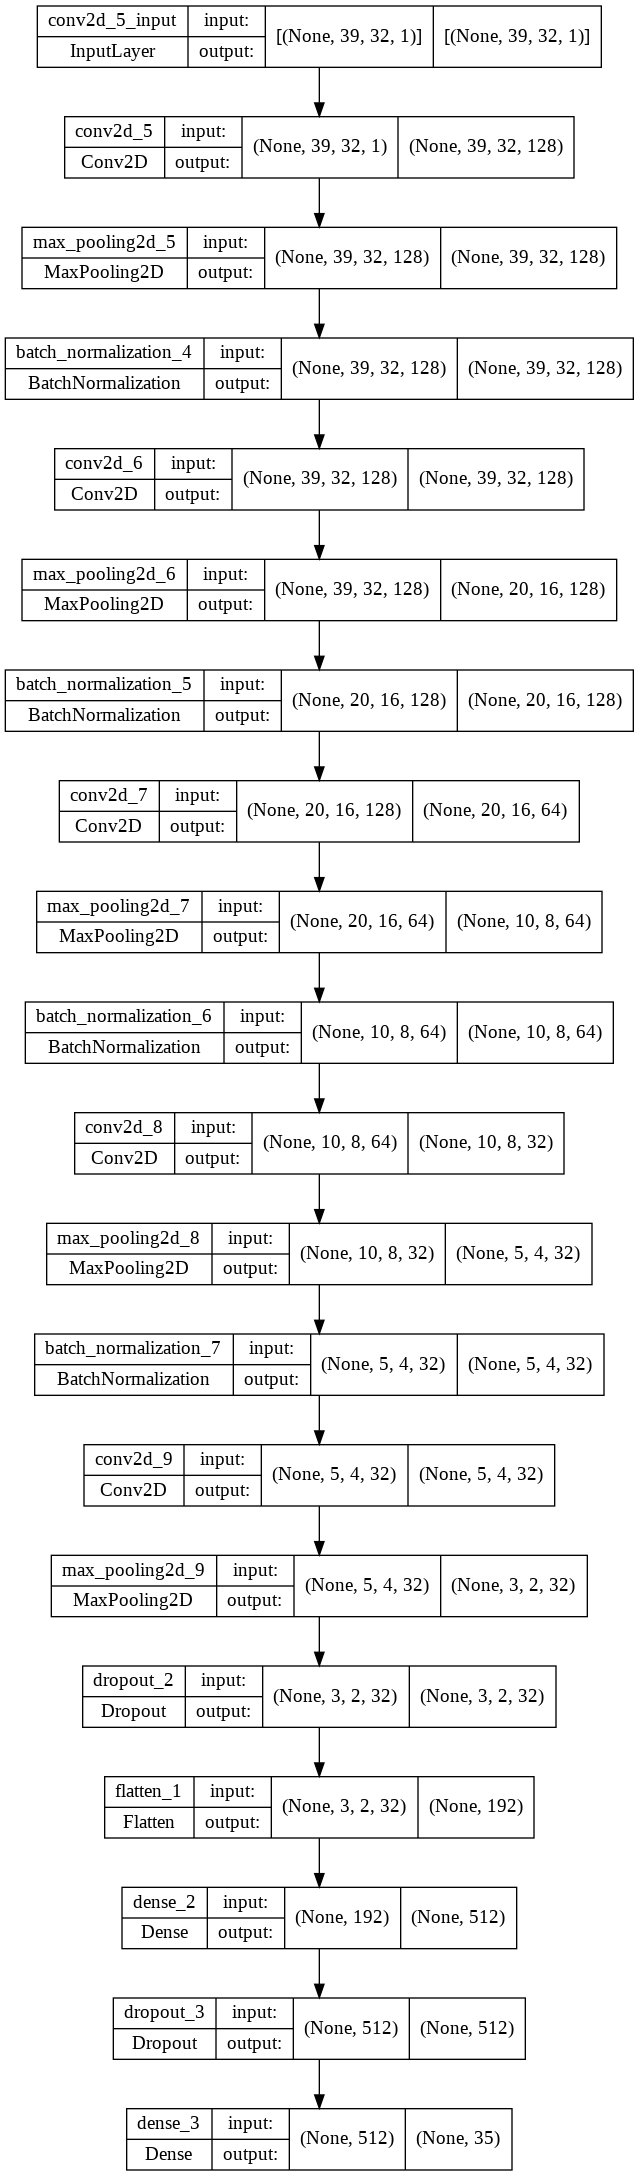

In [ ]:
tf.keras.utils.plot_model(model, 'modelcnn2D.png',show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Define the loss function to be categorical cross-entropy since it is a multi-classification problem.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
# Early stopping and model checkpoints are the callbacks to stop training the neural network at the right time and to save the best model after every epoch.
metric = 'val_accuracy'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('model.hdf5', monitor=metric, verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model.fit(x_train, y_train, epochs=300, callbacks= [mc, es], batch_size=32, validation_data=(x_test,y_test))

Epoch 1/300
2646/2646 [==============================] - ETA: 0s - loss: 1.2735 - accuracy: 0.6196
Epoch 1: val_accuracy improved from -inf to 0.82510, saving model to model.hdf5
2646/2646 [==============================] - 26s 9ms/step - loss: 1.2735 - accuracy: 0.6196 - val_loss: 0.5793 - val_accuracy: 0.8251
Epoch 2/300
2640/2646 [============================>.] - ETA: 0s - loss: 0.5916 - accuracy: 0.8213
Epoch 2: val_accuracy improved from 0.82510 to 0.85741, saving model to model.hdf5
2646/2646 [==============================] - 24s 9ms/step - loss: 0.5915 - accuracy: 0.8214 - val_loss: 0.4797 - val_accuracy: 0.8574
Epoch 3/300
2645/2646 [============================>.] - ETA: 0s - loss: 0.4690 - accuracy: 0.8597
Epoch 3: val_accuracy improved from 0.85741 to 0.87716, saving model to model.hdf5
2646/2646 [==============================] - 25s 9ms/step - loss: 0.4690 - accuracy: 0.8597 - val_loss: 0.4116 - val_accuracy: 0.8772
Epoch 4/300
2645/2646 [============================>.] 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

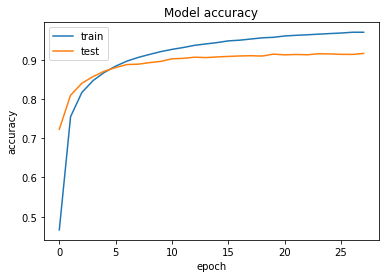

In [ ]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

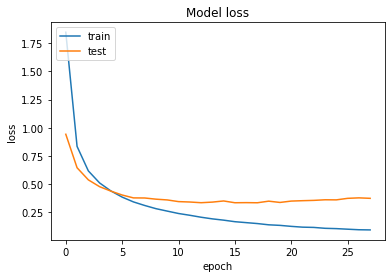

In [ ]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
train_score = model.evaluate(x_train, y_train)
accuracy = 100*train_score[1]
print("Accuracy of our model on train data: %.4f%%" % accuracy)
#-------------------------------------------------------------------
test_score = model.evaluate(x_test, y_test)
accuracy = 100*test_score[1]
print("Accuracy of our model on test data: %.4f%%" % accuracy)

2646/2646 [==============================] - 23s 9ms/step - loss: 0.0562 - accuracy: 0.9838
Accuracy of our model on train data: 98.3806%
662/662 [==============================] - 3s 5ms/step - loss: 0.3735 - accuracy: 0.9166
Accuracy of our model on test data: 91.6564%


In [ ]:
pred = model.predict(x_test) 
pred = np.argmax(pred, axis = 1)
label = np.argmax(y_test,axis = 1)

print(pred) 
print(label)

[30 29 34 ... 22  5 11]
[30 29 34 ... 22  5 11]


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = pred.flatten()
df['Actual Labels'] = label.flatten()

df.head(10)

Predicted Labels  Actual Labels
0                30             30
1                29             29
2                34             34
3                29             29
4                25             25
5                22             22
6                17             17
7                33             33
8                32             32
9                 7              7

[30 29 34 ... 22  5 11]
[30 29 34 ... 22  5 11]


Text(0.5, 294.0, 'Predicted Class')

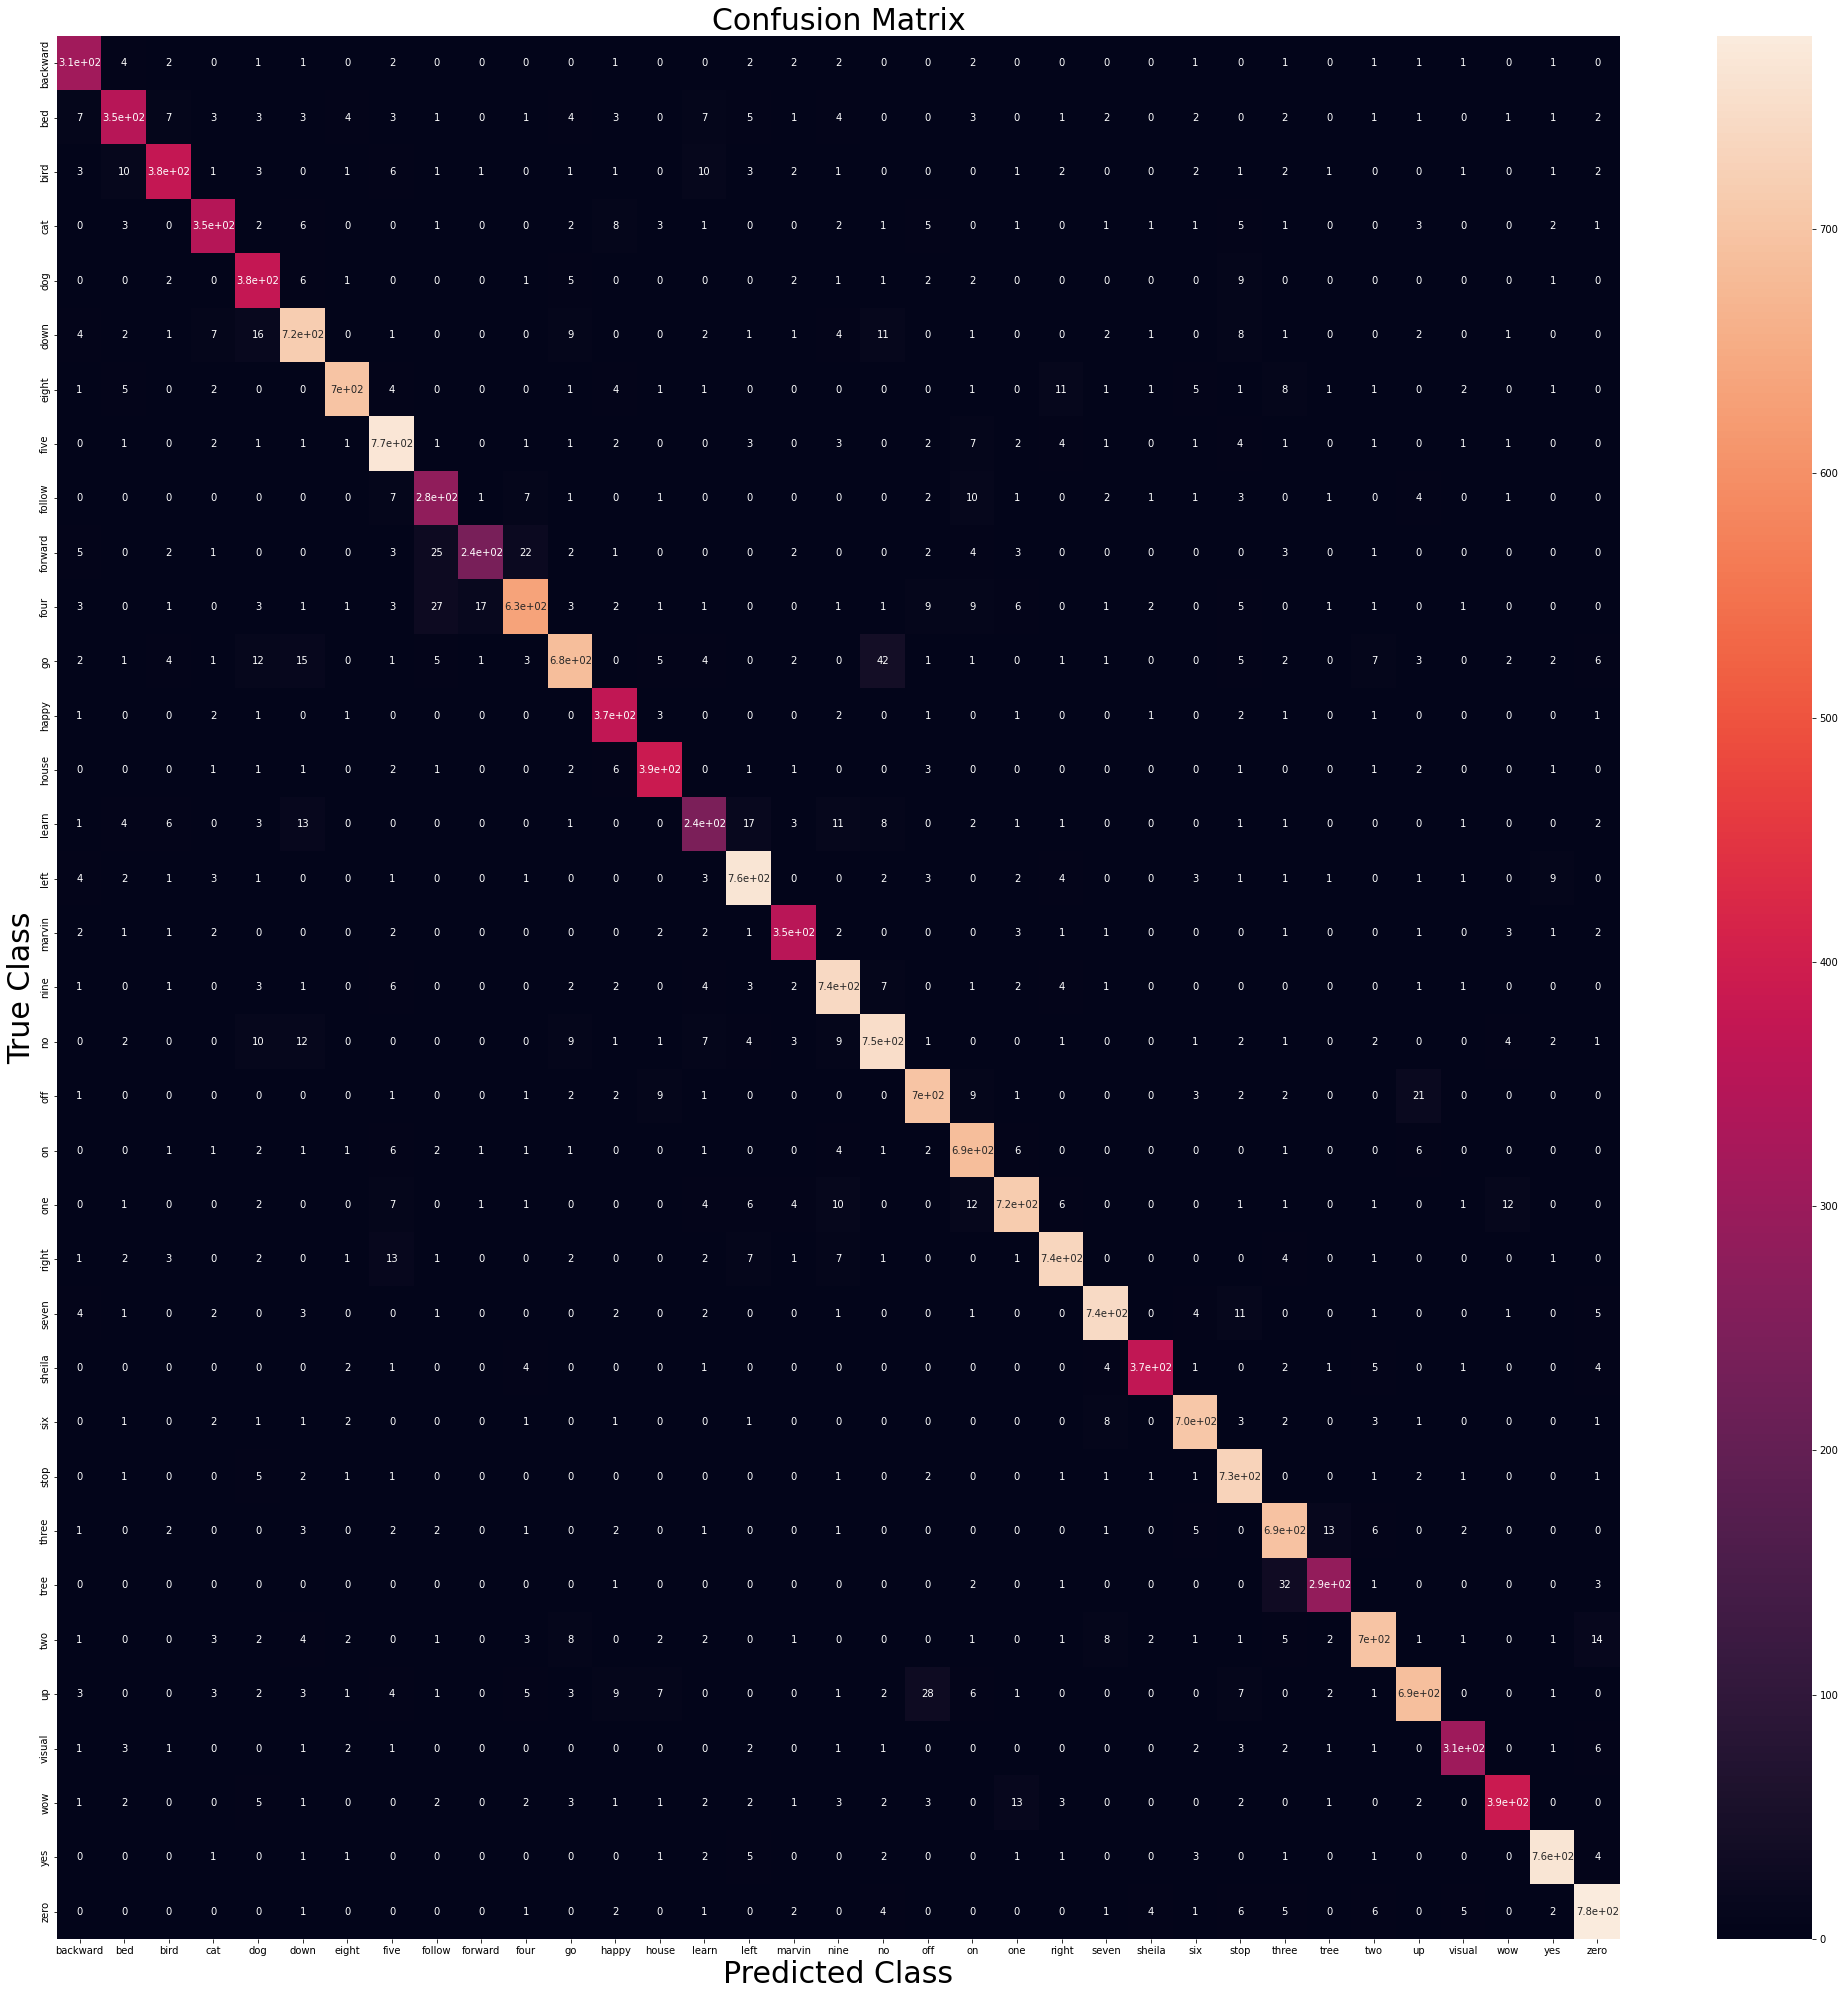

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
prediction= model.predict(x_test)
y_1=prediction.argmax(axis=-1)
y_2=y_test.argmax(axis=1)
print(y_1)
print(y_2)

conf_matrix=confusion_matrix(y_2, y_1)
classes = [ 'backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero' ]
df =pd.DataFrame(conf_matrix,index =[i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (35,35))
splot = sn.heatmap(df, annot=True)
plt.title("Confusion Matrix", fontsize=30)
plt.ylabel("True Class"     , fontsize=30)
plt.xlabel("Predicted Class", fontsize=30)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_2, y_1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       336
           1       0.88      0.83      0.86       424
           2       0.91      0.87      0.89       432
           3       0.90      0.87      0.89       399
           4       0.82      0.92      0.87       410
           5       0.90      0.91      0.90       791
           6       0.97      0.93      0.95       751
           7       0.91      0.95      0.93       809
           8       0.80      0.87      0.83       324
           9       0.92      0.76      0.83       315
          10       0.92      0.86      0.89       734
          11       0.92      0.84      0.88       814
          12       0.88      0.95      0.91       389
          13       0.91      0.94      0.93       413
          14       0.80      0.76      0.78       321
          15       0.92      0.95      0.93       809
          16       0.92      0.93      0.92       382
          17       0.91    

In [ ]:
from keras.models import load_model
model.save("SpeechRModel_1.h5")